average brightness :  87.87199029091515
threshold :  145.87199029091516


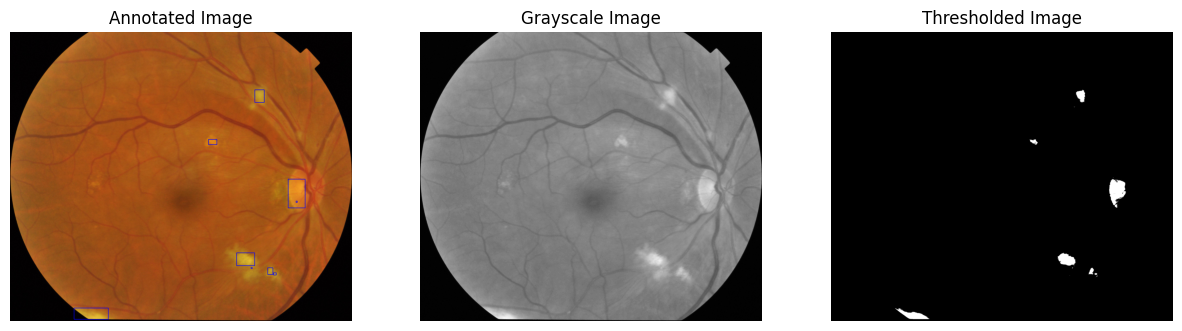

average brightness :  76.34884982638889
threshold :  134.34884982638889


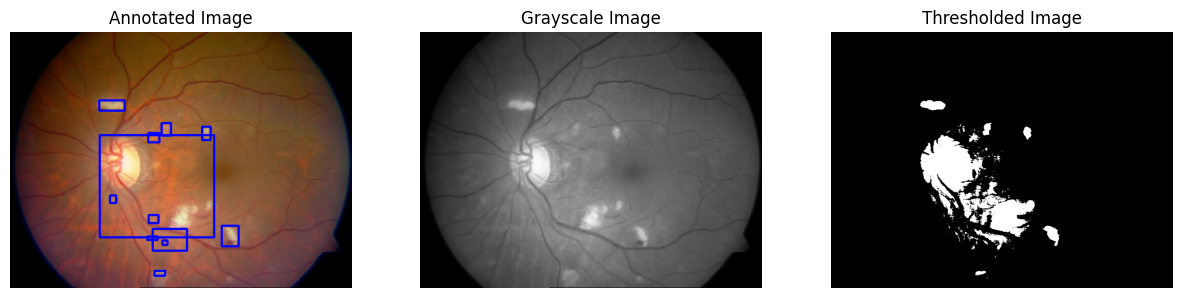

average brightness :  77.9109836320024
threshold :  135.9109836320024


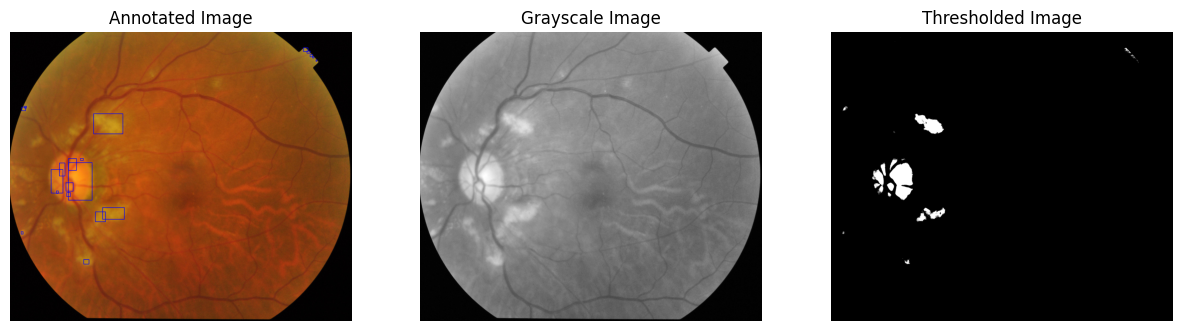

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os


image_paths = ["1.JPG", "2.JPG", "3.JPG"] 
output_folder = "./annotated_images2"

if not os.path.exists(output_folder):
    os.makedirs(output_folder)

def annotate_image(image_path):
    # Load image
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # here i Calculated the dynamic threshold based on brightness
    mean_brightness = np.mean(gray)  # Average intensity
    print("average brightness : ",mean_brightness)
    dynamic_threshold = max(100, min(150, mean_brightness + 58)) # i set up the min as 100 and max as 150 after i tested it manualy, and so far 58 is the best value for the 3 images
    print("threshold : ",dynamic_threshold)

    # the rest of the code is the same as test1
    _, thresh = cv2.threshold(gray, dynamic_threshold, 255, cv2.THRESH_BINARY)
    
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        
        if w * h < 100:
            continue
        
        cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 3)
    
    return img, gray, thresh

for image_path in image_paths:
    annotated_img, gray_img, thresh_img = annotate_image(image_path)
    
    output_path = f"{output_folder}/{image_path.split('/')[-1]}"
    cv2.imwrite(output_path, annotated_img)
    
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB))
    plt.title("Annotated Image")
    plt.axis("off")
    
    plt.subplot(1, 3, 2)
    plt.imshow(gray_img, cmap="gray")
    plt.title("Grayscale Image")
    plt.axis("off")
    
    plt.subplot(1, 3, 3)
    plt.imshow(thresh_img, cmap="gray")
    plt.title("Thresholded Image")
    plt.axis("off")
    
    plt.show()
